<a href="https://colab.research.google.com/github/parvathi456/python-practice/blob/main/Ai_Powered_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab already has TF, but ensure versions
import tensorflow as tf
print("TensorFlow", tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

TensorFlow 2.19.0


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
# Normalize
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0


In [4]:
# Convert labels to one-hot
num_classes = 10
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat  = tf.keras.utils.to_categorical(y_test, num_classes)

/tmp/ipython-input-71972672.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


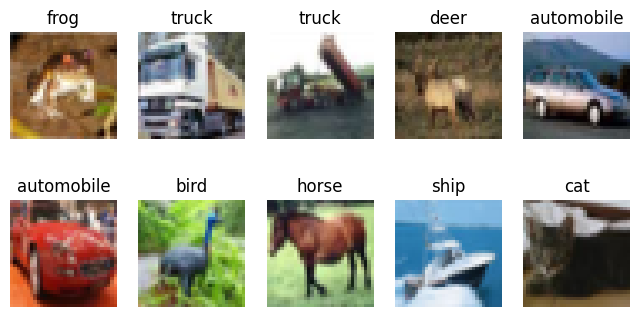

In [5]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.show()

In [6]:
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax'),
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 478,378 (1.82 MB)

 Trainable params: 478,186 (1.82 MB)

 Non-trainable params: 192 (768.00 B)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [8]:
batch_size = 64
epochs = 20  # reduce to ~10 for quick run, up to 30 for better accuracy

In [9]:
history = model.fit(datagen.flow(x_train, y_train_cat, batch_size=batch_size),
                    steps_per_epoch=len(x_train)//batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test_cat))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 203s 256ms/step - accuracy: 0.2754 - loss: 2.0254 - val_accuracy: 0.4269 - val_loss: 1.5374
Epoch 2/20
  1/781 ━━━━━━━━━━━━━━━━━━━━ 2:49 217ms/step - accuracy: 0.3906 - loss: 1.6971

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3906 - loss: 1.6971 - val_accuracy: 0.4315 - val_loss: 1.5219
Epoch 3/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 199s 254ms/step - accuracy: 0.4407 - loss: 1.5230 - val_accuracy: 0.4298 - val_loss: 1.8913
Epoch 4/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4688 - loss: 1.5034 - val_accuracy: 0.4208 - val_loss: 1.9283
Epoch 5/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 197s 252ms/step - accuracy: 0.5271 - loss: 1.3157 - val_accuracy: 0.4683 - val_loss: 1.7682
Epoch 6/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.6562 - loss: 0.9362 - val_accuracy: 0.4647 - val_loss: 1.8080
Epoch 7/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 195s 250ms/step - accuracy: 0.5853 - loss: 1.1855 - val_accuracy: 0.5168 - val_loss: 1.4801
Epoch 8/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6406 - loss: 0.9536 - val_accuracy: 0.5007 - val_loss: 1.5409
Epoch 9/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 259s 258ms/step - accuracy: 0.6216 - loss: 1.0888 - val_ac

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print("Test accuracy:", test_acc)

# Save model
model.save('cifar10_cnn.h5')

313/313 - 8s - 26ms/step - accuracy: 0.7270 - loss: 0.7952


Test accuracy: 0.7269999980926514


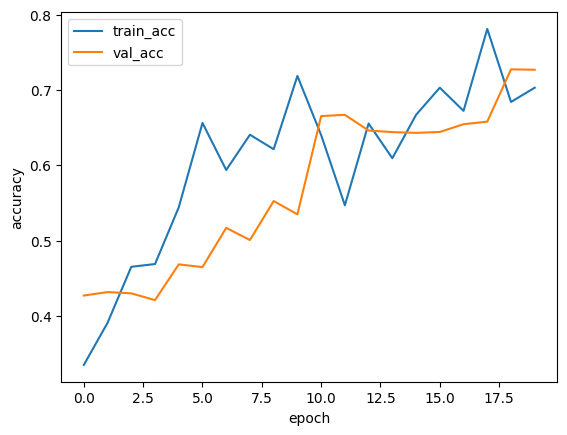

In [11]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.xlabel('epoch'); plt.ylabel('accuracy')
plt.show()

In [12]:
preds = model.predict(x_test[:10])
pred_labels = np.argmax(preds, axis=1)
for i in range(10):
    print("True:", class_names[int(y_test[i])], "Pred:", class_names[int(pred_labels[i])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
True: cat Pred: cat
True: ship Pred: ship
True: ship Pred: ship
True: airplane Pred: ship
True: frog Pred: frog
True: frog Pred: frog
True: automobile Pred: automobile
True: frog Pred: frog
True: cat Pred: cat
True: automobile Pred: automobile


/tmp/ipython-input-1183415704.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("True:", class_names[int(y_test[i])], "Pred:", class_names[int(pred_labels[i])])
